In [1]:
import cv2 as cv

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
print('Using OpenCV version', cv.__version__)

Using OpenCV version 3.1.0


In [3]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

In [4]:
img = cv.imread('selfie.jpg')

In [5]:
grayscale_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
detected_faces = face_cascade.detectMultiScale(grayscale_img, 1.3, 5)

for x, y, width, height in detected_faces:
    # Draw rectangle around face.
    cv.rectangle(img, (x, y), (x + width, y + height), (255, 0, 0), 2)
    
    # Detect eyes.
    roi_grayscale = grayscale_img[y:y + height, x:x + width]
    roi_color = img[y:y + height, x:x + width]
    detected_eyes = eye_cascade.detectMultiScale(roi_grayscale)
    
    for eye_x, eye_y, eye_width, eye_height in detected_eyes:
        cv.rectangle(roi_color,
                     (eye_x, eye_y),
                     (eye_x + eye_width, eye_y + eye_height),
                     (0, 255, 0),
                     2)

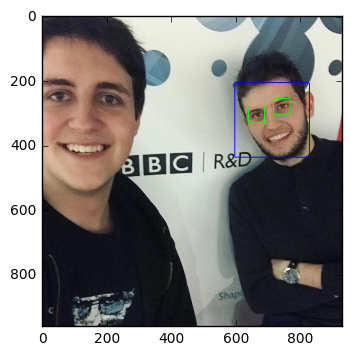

In [6]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))